# **IRWA PROJECT**

## PART 1. Text Processing & Exploratory Data Analysis


Alba González - 242783

Mario Muñoz - 229829

María Tormo - 240210

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Python packages

In [ ]:
# if you do not have 'nltk', the following command should work "python -m pip install nltk"
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import json
import re
import time
import requests
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import spacy
import pandas as pd
from textblob import TextBlob

Load data into memory

In [ ]:
docs_path = '/content/Rus_Ukr_war_data.json'

with open(docs_path) as fp:
    lines = fp.readlines()
lines = [l.strip().replace(' +', ' ') for l in lines]


Step 1. Pre-process documents:

● Remove stop words

● Tokenization

● Remove punctuation marks

● Stemming

● and... anything else you think it's needed (bonus point):
  - remove emojis
  - extract URLs from text

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def build_terms(line):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """


    ## START CODE

    url_pattern = r'https?://\S+|www\.\S+'

    urls = re.findall(url_pattern, text)
    line = re.sub(url_pattern, '', text)

    line = line.lower()  ## Transform in lowercase
    clean_text = re.sub(r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text) #Remove punctuation marks
    line = re.sub(r'\W', ' ', line) #Remove emojis
    line = line.split() ## Tokenize the text to get a list of terms
    line = [word for word in line if word not in stop_words]  ##eliminate the stopwords (HINT: use List Comprehension)
    line = [stemmer.stem(word) for word in line] ## perform stemming (HINT: use List Comprehension)

    return line, urls

tweets = {}
for line in lines:
  data = json.loads(line)
  text = data["full_text"]
  processed_line, url_line = build_terms(text)

  tweets[data["id"]] = { "Tweet" : processed_line,
                        "Date": data["created_at"],
                         "Hashtags": [entity['text'] for entity in data["entities"]['hashtags']],
                         "Likes": data["favorite_count"],
                         "Retweets": data["retweet_count"],
                         "Urls": url_line }
  #print(tweets)

Convert Tweets dictionary into DataFrame

In [ ]:
#Create dataframe from tweets dictionary and traverse it (we prefer that format)
tweets_df = pd.DataFrame.from_dict(tweets).T
tweets_df.index.name = 'Tweet IDs'
display(tweets_df)

,Tweet,Date,Hashtags,Likes,Retweets,Urls
Tweet IDs,,,,,,
1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Fri Sep 30 18:39:17 0000 2022,"[RussiainvadesUkraine, UkraineRussiaWar]",0,0,[]
1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Fri Sep 30 18:38:44 0000 2022,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0,0,[https://t.co/ifg0RXDMBQ]
1575917992390823936,"[alert, poland, prep, anti, radiat, tablet, nu...",Fri Sep 30 18:38:23 0000 2022,"[NATO, Putin, Russia, RussiaInvadedUkraine, Uk...",0,0,[]
1575917907774967809,"[still, wait, googl, map, updat, russia, new, ...",Fri Sep 30 18:38:03 0000 2022,"[Putin, UkraineRussiaWar]",0,0,[]
1575917878410301441,"[emmanuelmacron, probabl, right, say, anyway, ...",Fri Sep 30 18:37:56 0000 2022,"[European, UkraineRussiaWar]",0,0,[]
...,...,...,...,...,...,...
1575154617620504576,"[ukrain, presid, warn, russia, sham, referendu...",Wed Sep 28 16:05:00 0000 2022,[UkraineRussiaWar],4,1,[https://t.co/Ld9SN2pz25]
1575154444165156864,"[germani, amusingli, share, day, old, intellig...",Wed Sep 28 16:04:19 0000 2022,"[germany, UkraineRussiaWar]",0,0,[https://t.co/IhyKe3cYGG]
1575154440012812288,"[us, embassi, moscow, urg, american, leav, rus...",Wed Sep 28 16:04:18 0000 2022,"[fakenewsfilter, RealNews, news, RussianMobili...",0,0,"[https://t.co/gQ8lbf1F7Q, https://t.co/rT1q343..."


Merge Document IDs and Tweet IDs

In [ ]:
#Read file with Document IDs and Tweet IDs
ids_data = pd.read_csv("/content/Rus_Ukr_war_data_ids.csv", sep='\t', header=None, names=["Doc IDs", "Tweet IDs"])
ids_data.head()

,Doc IDs,Tweet IDs
0,doc_1,1575918221013979136
1,doc_2,1575918081461080065
2,doc_3,1575917992390823936
3,doc_4,1575917907774967809
4,doc_5,1575917878410301441


In [ ]:
#Merge ids_data with tweets df (with tweets info)
merged_df = pd.merge(ids_data, tweets_df, on='Tweet IDs', how='inner')
display(merged_df)

,Doc IDs,Tweet IDs,Tweet,Date,Hashtags,Likes,Retweets,Urls
0,doc_1,1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Fri Sep 30 18:39:17 0000 2022,"[RussiainvadesUkraine, UkraineRussiaWar]",0,0,[]
1,doc_2,1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Fri Sep 30 18:38:44 0000 2022,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0,0,[https://t.co/ifg0RXDMBQ]
2,doc_3,1575917992390823936,"[alert, poland, prep, anti, radiat, tablet, nu...",Fri Sep 30 18:38:23 0000 2022,"[NATO, Putin, Russia, RussiaInvadedUkraine, Uk...",0,0,[]
3,doc_4,1575917907774967809,"[still, wait, googl, map, updat, russia, new, ...",Fri Sep 30 18:38:03 0000 2022,"[Putin, UkraineRussiaWar]",0,0,[]
4,doc_5,1575917878410301441,"[emmanuelmacron, probabl, right, say, anyway, ...",Fri Sep 30 18:37:56 0000 2022,"[European, UkraineRussiaWar]",0,0,[]
...,...,...,...,...,...,...,...,...
3995,doc_3996,1575154617620504576,"[ukrain, presid, warn, russia, sham, referendu...",Wed Sep 28 16:05:00 0000 2022,[UkraineRussiaWar],4,1,[https://t.co/Ld9SN2pz25]
3996,doc_3997,1575154444165156864,"[germani, amusingli, share, day, old, intellig...",Wed Sep 28 16:04:19 0000 2022,"[germany, UkraineRussiaWar]",0,0,[https://t.co/IhyKe3cYGG]
3997,doc_3998,1575154440012812288,"[us, embassi, moscow, urg, american, leav, rus...",Wed Sep 28 16:04:18 0000 2022,"[fakenewsfilter, RealNews, news, RussianMobili...",0,0,"[https://t.co/gQ8lbf1F7Q, https://t.co/rT1q343..."
3998,doc_3999,1575154351273873410,"[stage, fake, referendum, septemb, 2022, russi...",Wed Sep 28 16:03:56 0000 2022,[UkraineRussiaWar],13,2,[https://t.co/XQOJq8b3M1]


##Step 2. Exploratory Data Analysis:


# Word counting distribution



Average =  17.459


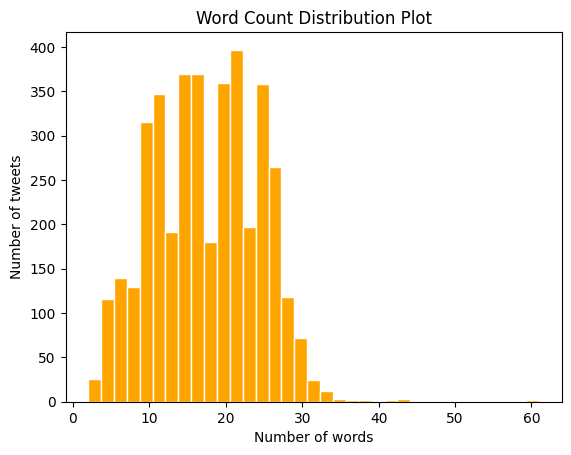

In [ ]:
#count the number of words on each tweet
word_count = []
for tweet in merged_df["Tweet"]:
  count = len(tweet)
  word_count.append(count)

print("Average = ", sum(word_count)/len(word_count))

#display word counting distribution
plt.hist(word_count , bins=35, edgecolor='white', color='orange')
plt.title("Word Count Distribution Plot")
plt.xlabel("Number of words")
plt.ylabel("Number of tweets")
plt.show()

# Word Cloud for most frequent words

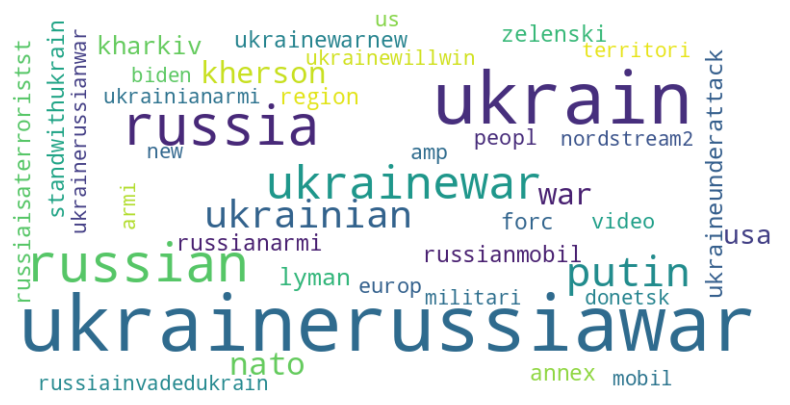

In [ ]:
#search for the n most common words
n = 40
all_words = merged_df["Tweet"].explode().tolist()
word_frequencies = Counter(all_words)
most_common_words = word_frequencies.most_common(n)

#create a dictionary with n most common words and his frequency
words_count = dict(most_common_words)

#display wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###Ranking of Top 10 Tweets with most Retweets

In [ ]:
# Sort the DataFrame by the "Retweets" column in descending order to create a ranking
ranked_retweets = merged_df.sort_values(by='Retweets', ascending=False)

# Reset the index of the DataFrame
ranked_retweets.reset_index(drop=True, inplace=True)

# Display the top-10 ranking of tweets
display(ranked_retweets.head(10))

,Doc IDs,Tweet IDs,Tweet,Date,Hashtags,Likes,Retweets,Urls
0,doc_1220,1575775162674212865,"[situat, around, lyman, sep, 30, 11, 00, ua, f...",Fri Sep 30 09:10:49 0000 2022,[UkraineRussiaWar],3701,646,[https://t.co/jGJUhXcr1y]
1,doc_2814,1575396903252025351,"[uniqu, rare, photo, ukrainian, forward, comma...",Thu Sep 29 08:07:45 0000 2022,"[Kharkiv, UkraineRussiaWar]",2685,338,[https://t.co/AmSijyM59c]
2,doc_3766,1575181552170201088,"[oper, interflex, ukrainian, recruit, continu,...",Wed Sep 28 17:52:02 0000 2022,[UkraineRussiaWar],2155,283,[https://t.co/oYWThs8qNe]
3,doc_1847,1575625313446289409,"[follow, countri, urg, citizen, leav, updat, g...",Thu Sep 29 23:15:23 0000 2022,"[UkraineRussiaWar, AnnexationofUkraine, NAFO]",923,251,[]
4,doc_1388,1575742923068813314,"[russian, shell, outskirt, zaporizhzhia, hit, ...",Fri Sep 30 07:02:43 0000 2022,"[Zaporizhzhia, UkraineRussiaWar]",694,247,[https://t.co/365j43jy51]
5,doc_1210,1575778551248605184,"[war, end, call, annex, referendum, genuin, ex...",Fri Sep 30 09:24:17 0000 2022,"[Ukraine, UkraineRussiaWar, NFTs]",270,236,[https://t.co/yfZAeV7K8d]
6,doc_1533,1575686562616004609,"[russia, may, drop, 11, meter, long, x, 22, mi...",Fri Sep 30 03:18:46 0000 2022,"[Dnipro, NATORussiaWar, UkraineRussiaWar, Kher...",713,184,[https://t.co/NuRQPVMzkJ]
7,doc_206,1575896773511434240,"[ukrainian, forc, liber, drobyshev, donetsk, o...",Fri Sep 30 17:14:04 0000 2022,"[Donetsk, UkraineRussiaWar]",1407,171,[https://t.co/7wUCdcA7NZ]
8,doc_2119,1575559188079845376,"[kostyantyn, nemichev, command, kraken, specia...",Thu Sep 29 18:52:37 0000 2022,[UkraineRussiaWar],1407,136,[https://t.co/vpQcmL92q7]
9,doc_3802,1575178643772297216,"[ukrainian, paratroop, btr, 3, offens, kharkiv...",Wed Sep 28 17:40:28 0000 2022,"[Kharkiv, Donetsk, UkraineRussiaWar]",1348,133,[https://t.co/00LrzsG7QO]


###Plot with most Retweeted Tweets with Tweet IDs versus Retweeted counter

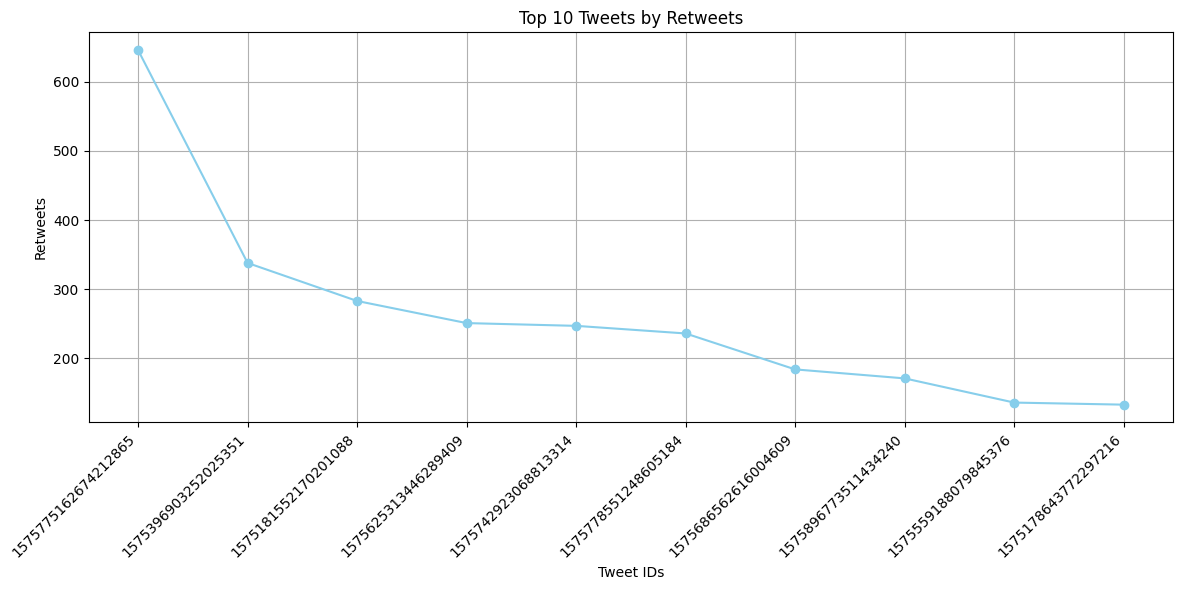

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already sorted and reset the index of 'merged_df'
# You can use 'ranked_tweets' to create the line plot

# Get the top 10 tweets
top_10_retweets = ranked_retweets.head(10)

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), top_10_retweets['Retweets'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Tweet IDs')
plt.ylabel('Retweets')
plt.title('Top 10 Tweets by Retweets')
plt.grid(True)

# Set custom x-axis labels
plt.xticks(range(1, 11), top_10_retweets['Tweet IDs'], rotation=45, ha='right')
plt.tight_layout()

# Display the line plot
plt.show()

###Ranking of Top 10 Tweets with most Likes (highest like counter)

In [ ]:
# Sort the DataFrame by the "Retweets" column in descending order to create a ranking
ranked_likes = merged_df.sort_values(by='Likes', ascending=False)

# Reset the index of the DataFrame
ranked_likes.reset_index(drop=True, inplace=True)

# Display the top-10 ranking of tweets
display(ranked_likes.head(10))

,Doc IDs,Tweet IDs,Tweet,Date,Hashtags,Likes,Retweets,Urls
0,doc_1220,1575775162674212865,"[situat, around, lyman, sep, 30, 11, 00, ua, f...",Fri Sep 30 09:10:49 0000 2022,[UkraineRussiaWar],3701,646,[https://t.co/jGJUhXcr1y]
1,doc_2814,1575396903252025351,"[uniqu, rare, photo, ukrainian, forward, comma...",Thu Sep 29 08:07:45 0000 2022,"[Kharkiv, UkraineRussiaWar]",2685,338,[https://t.co/AmSijyM59c]
2,doc_3766,1575181552170201088,"[oper, interflex, ukrainian, recruit, continu,...",Wed Sep 28 17:52:02 0000 2022,[UkraineRussiaWar],2155,283,[https://t.co/oYWThs8qNe]
3,doc_2824,1575391586422243333,"[czech, volunt, ongo, offens, ukrainian, forc,...",Thu Sep 29 07:46:38 0000 2022,"[Kharkiv, UkraineRussiaWar]",1631,114,[https://t.co/u9tnLGvXlw]
4,doc_206,1575896773511434240,"[ukrainian, forc, liber, drobyshev, donetsk, o...",Fri Sep 30 17:14:04 0000 2022,"[Donetsk, UkraineRussiaWar]",1407,171,[https://t.co/7wUCdcA7NZ]
5,doc_2119,1575559188079845376,"[kostyantyn, nemichev, command, kraken, specia...",Thu Sep 29 18:52:37 0000 2022,[UkraineRussiaWar],1407,136,[https://t.co/vpQcmL92q7]
6,doc_3802,1575178643772297216,"[ukrainian, paratroop, btr, 3, offens, kharkiv...",Wed Sep 28 17:40:28 0000 2022,"[Kharkiv, Donetsk, UkraineRussiaWar]",1348,133,[https://t.co/00LrzsG7QO]
7,doc_451,1575855193547165696,"[zelenski, announc, ukrain, submit, acceler, a...",Fri Sep 30 14:28:50 0000 2022,[UkraineRussiaWar],1083,96,[https://t.co/3uIQx0I9HI]
8,doc_1847,1575625313446289409,"[follow, countri, urg, citizen, leav, updat, g...",Thu Sep 29 23:15:23 0000 2022,"[UkraineRussiaWar, AnnexationofUkraine, NAFO]",923,251,[]
9,doc_1245,1575768715668656128,"[ukrainian, forc, liber, yampil, donetsk, obla...",Fri Sep 30 08:45:12 0000 2022,"[Donetsk, UkraineRussiaWar]",868,69,[https://t.co/592W2houOq]


###Plot with most Retweeted Tweets with Tweet IDs versus Retweeted counter

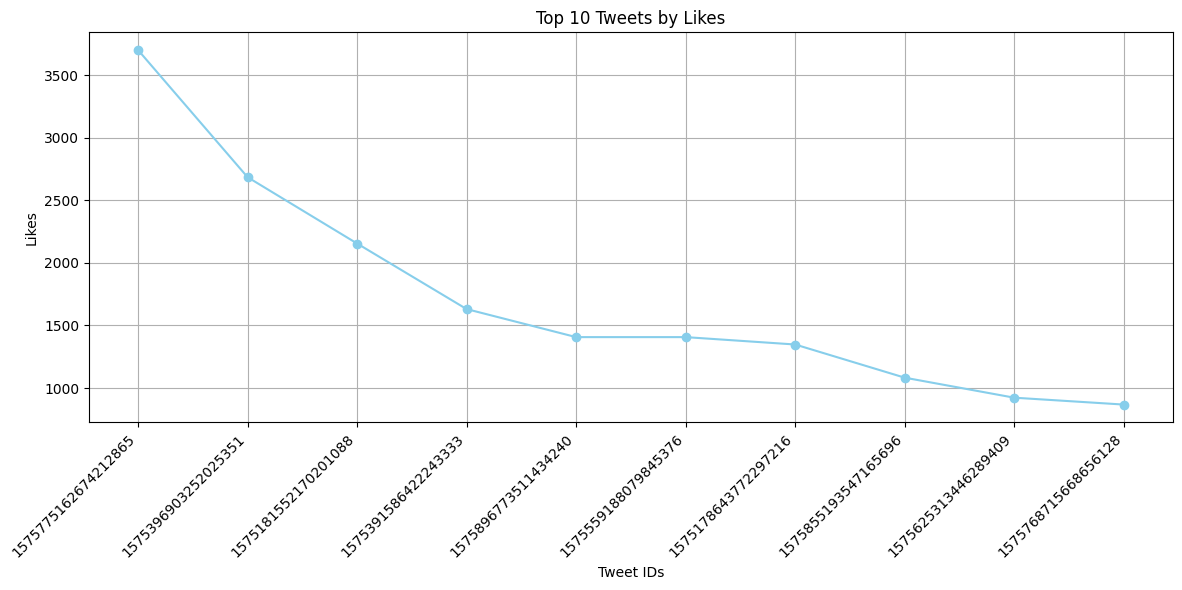

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the "Likes" column in descending order to create a ranking
ranked_likes = merged_df.sort_values(by='Likes', ascending=False)

# Reset the index of the DataFrame
ranked_likes.reset_index(drop=True, inplace=True)

# Get the top 10 tweets
top_10_likes = ranked_likes.head(10)

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), top_10_likes['Likes'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Tweet IDs')
plt.ylabel('Likes')
plt.title('Top 10 Tweets by Likes')
plt.grid(True)

# Set custom x-axis labels
plt.xticks(range(1, 11), top_10_likes['Tweet IDs'], rotation=45, ha='right')
plt.tight_layout()

# Display the line plot
plt.show()

###Entity Recognition

In [ ]:
# Load the language model
nlp = spacy.load("en_core_web_sm")

# Process the text and count entities
entity_counter = Counter()

for tweet in merged_df["Tweet"].to_list():
    tweet2string = " ".join(tweet)
    doc = nlp(tweet2string)

    # Count entities
    for ent in doc.ents:
        entity_counter[ent.text] += 1

# Sort entities by count in descending order
sorted_entities = sorted(entity_counter.items(), key=lambda x: x[1], reverse=True)

# Display the top 5 entities
for ent, count in sorted_entities[:5]:
    print(f"Entity: {ent}, Count: {count}")

Entity: russia, Count: 1802
Entity: russian, Count: 1526
Entity: nato, Count: 364
Entity: putin, Count: 235
Entity: zelenski, Count: 194


# Sentimental Analysis

In [ ]:
def analyze_sentiment(tweet):
    tweet = ' '.join(tweet)
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

In [ ]:
def get_entities(tweet_words):
    tweet_words = tweet_words
    tweet2string = " ".join(tweet_words)
    doc = nlp(tweet2string)
    entities = [{'Entity': entity.text, 'Label': entity.label_}for entity in doc.ents]
    return entities

In [ ]:
merged_df2 = merged_df.copy()
merged_df2['Sentiment'] = merged_df2['Tweet'].apply(analyze_sentiment)

merged_df2['Entites'] = merged_df2['Tweet'].apply(get_entities)
merged_df2.head(2)

,Doc IDs,Tweet IDs,Tweet,Date,Hashtags,Likes,Retweets,Urls,Sentiment,Entites
0,doc_1,1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Fri Sep 30 18:39:17 0000 2022,"[RussiainvadesUkraine, UkraineRussiaWar]",0,0,[],Negative,"[{'Entity': 'putin', 'Label': 'PERSON'}, {'Ent..."
1,doc_2,1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Fri Sep 30 18:38:44 0000 2022,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0,0,[https://t.co/ifg0RXDMBQ],Neutral,[]


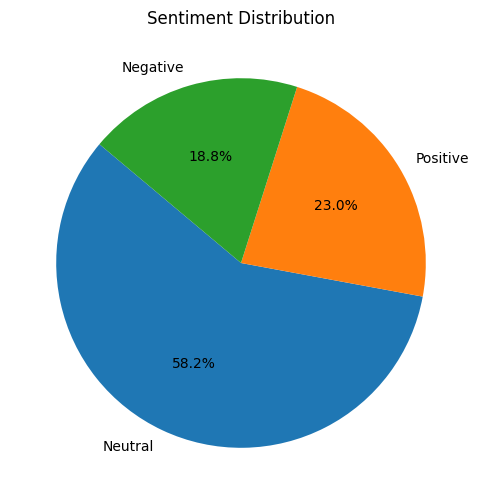

In [ ]:
# Count the number of tweets in each sentiment category
sentiment_counts = merged_df2['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')

# Show the pie chart
plt.show()

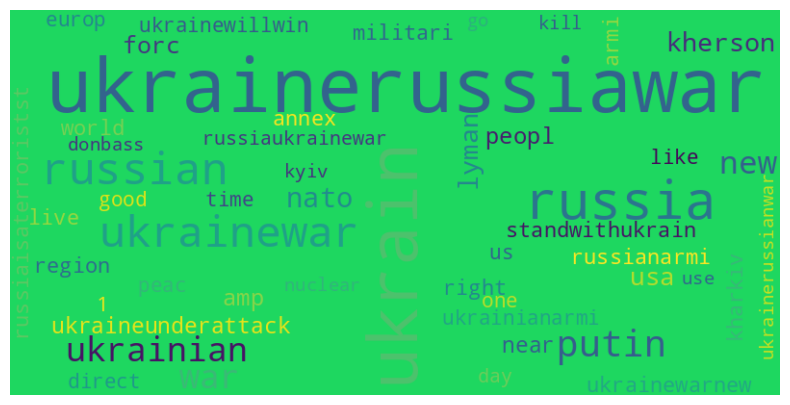

In [ ]:
#Word Cloud of positive tweets
n = 50
print
all_words = merged_df2[merged_df2['Sentiment']== "Positive"]["Tweet"].explode().tolist()
word_frequencies = Counter(all_words)
most_common_words = word_frequencies.most_common(n)

#create a dictionary with n most common words and his frequency
words_count = dict(most_common_words)

#display wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='#1ed760').generate_from_frequencies(words_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Word Cloud of negative tweets
n = 50
print
all_words = merged_df2[merged_df2['Sentiment']== "Negative"]["Tweet"].explode().tolist()
word_frequencies = Counter(all_words)
most_common_words = word_frequencies.most_common(n)

#create a dictionary with n most common words and his frequency
words_count = dict(most_common_words)

#display wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(words_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()